In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
import pickle
warnings.filterwarnings('ignore')

### Importing CSV File

In [ ]:
df = pd.read_csv('Parkinsson disease.csv')

### Size of the Data

In [ ]:
df.shape

(195, 24)

In [ ]:
df.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
63,phon_R01_S17_4,228.832,234.619,223.634,0.00296,0.00001,0.00175,0.00155,0.00526,0.01644,...,0.02647,0.00351,25.964,0,0.256570,0.683296,-7.245620,0.018689,2.498224,0.093534
123,phon_R01_S31_2,182.018,197.173,79.187,0.00842,0.00005,0.00506,0.00449,0.01517,0.02503,...,0.04115,0.01813,18.784,1,0.589956,0.732903,-5.445140,0.142466,2.174306,0.215558
153,phon_R01_S37_1,121.345,139.644,98.250,0.00684,0.00006,0.00388,0.00332,0.01164,0.02534,...,0.04019,0.04179,21.520,1,0.566867,0.670475,-4.865194,0.246404,2.013530,0.168581
81,phon_R01_S20_4,95.605,107.715,87.549,0.00702,0.00007,0.00428,0.00371,0.01283,0.03156,...,0.05377,0.01825,19.659,1,0.576084,0.778747,-5.132032,0.210458,2.232576,0.260633
26,phon_R01_S06_3,171.041,208.313,75.501,0.00455,0.00003,0.00250,0.00234,0.00750,0.01966,...,0.02666,0.01095,25.908,1,0.418622,0.720916,-6.183590,0.226278,2.589702,0.147403


### Checking Missing Values

In [ ]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Checking Duplicate Values

In [ ]:
df.duplicated().sum()

0

### Drop unwanted columns

In [ ]:
df = df.drop(columns='name')

### To check how skewed the data is 

In [ ]:
df.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

### Renaming Columns

In [ ]:
df.rename(columns=({'MDVP:Fo(Hz)':'avg_fre', 'MDVP:Fhi(Hz)':'max_fre', 'MDVP:Flo(Hz)':'min_fre', 'MDVP:Jitter(%)':'jitter_per',
       'MDVP:Jitter(Abs)':'jitter_abs', 'MDVP:RAP':'mdvp_rap', 'MDVP:PPQ':'mdvp_ppq', 'Jitter:DDP':'ddp_jitter',
       'MDVP:Shimmer':'shimmer_amp1', 'MDVP:Shimmer(dB)':'shimmer_db', 'Shimmer:APQ3':'shimmer_apq3', 'Shimmer:APQ5':'shimmer_apq5',
       'MDVP:APQ':'mdvp_apq', 'Shimmer:DDA':'shimmer_dda'}),inplace=True)
df

,avg_fre,max_fre,min_fre,jitter_per,jitter_abs,mdvp_rap,mdvp_ppq,ddp_jitter,shimmer_amp1,shimmer_db,...,shimmer_dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### Separating Input feature from Output feature

In [ ]:
x = df.iloc[:,df.columns!='status']
y = df.iloc[:,df.columns=='status']

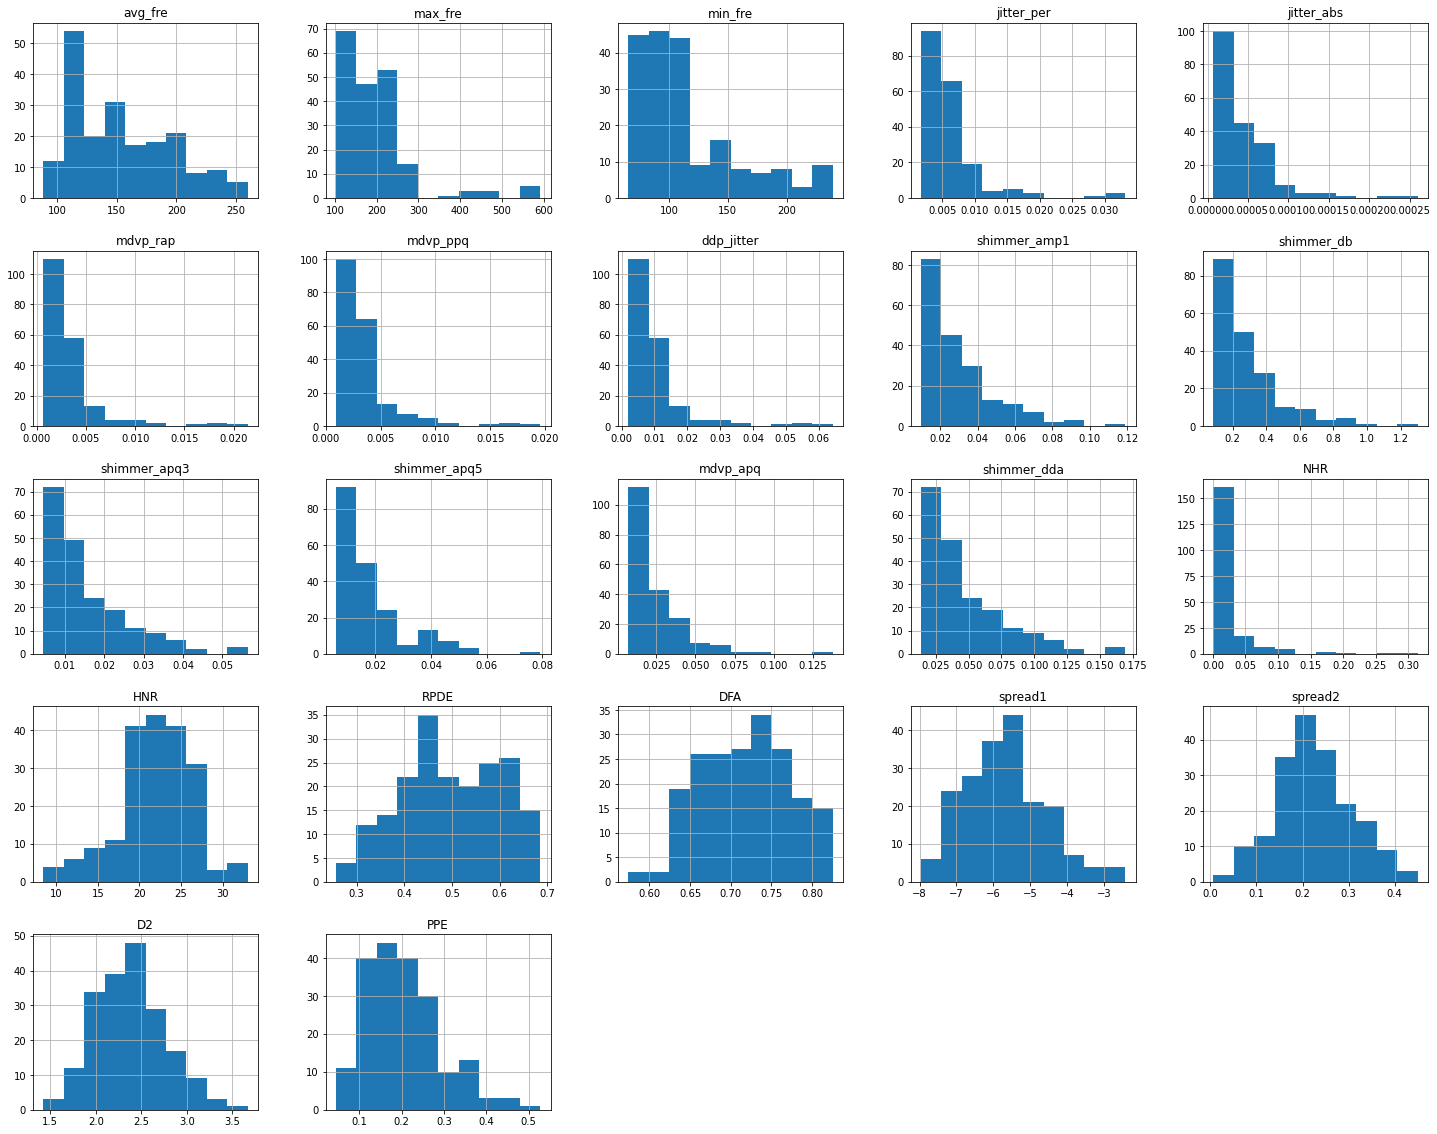

In [ ]:
x.hist(figsize=(25,20))
plt.show()

In [ ]:
df.columns

Index(['avg_fre', 'max_fre', 'min_fre', 'jitter_per', 'jitter_abs', 'mdvp_rap',
       'mdvp_ppq', 'ddp_jitter', 'shimmer_amp1', 'shimmer_db', 'shimmer_apq3',
       'shimmer_apq5', 'mdvp_apq', 'shimmer_dda', 'NHR', 'HNR', 'status',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### Removing Skewness

In [ ]:
df=df[df.max_fre<300]
df=df[df.jitter_per<0.020]
df=df[df.jitter_abs<0.00015]
df=df[df.mdvp_rap<0.010]
df=df[df.mdvp_ppq<0.01000]
df=df[df.shimmer_amp1<0.08]
df=df[df.shimmer_db<0.8]
df=df[df.shimmer_apq3<0.04]
df=df[df.shimmer_apq5<0.05]
df=df[df.mdvp_apq<0.08]
df=df[df.shimmer_dda<0.150]
df=df[df.NHR<0.06]

In [ ]:
df.skew()

avg_fre         0.638936
max_fre         0.338641
min_fre         1.251790
jitter_per      0.821052
jitter_abs      0.871523
mdvp_rap        0.869012
mdvp_ppq        1.464559
ddp_jitter      0.868735
shimmer_amp1    1.080701
shimmer_db      1.136427
shimmer_apq3    1.128437
shimmer_apq5    1.464967
mdvp_apq        1.080953
shimmer_dda     1.128364
NHR             1.324554
HNR             0.185571
status         -1.074337
RPDE           -0.050766
DFA            -0.124016
spread1         0.308699
spread2         0.119955
D2              0.194064
PPE             0.599573
dtype: float64

### Applying MinMaxScaler to all columns

In [ ]:
scaler=MinMaxScaler((-1,1))
x = scaler.fit_transform(x)

### Train Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### SVC

In [ ]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,y_train)
predict1 = model1.predict(X_test)

In [ ]:
print(accuracy_score(y_test,predict1)*100)

88.13559322033898


Text(0.5, 1.0, 'Output Confusion Matrix')

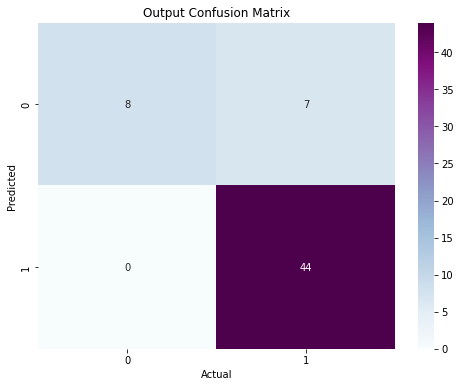

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict1)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap='BuPu')
figure=fg.get_figure()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Output Confusion Matrix')

### ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model2 = ExtraTreesClassifier()
model2.fit(X_train,y_train)
predict2 = model2.predict(X_test)

In [ ]:
print(accuracy_score(y_test,predict2)*100)

94.91525423728814


Text(0.5, 1.0, 'Output Confusion Matrix')

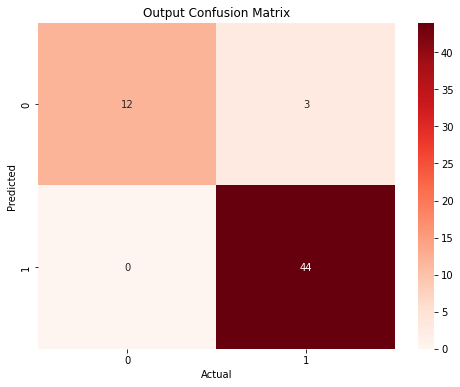

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict2)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap='Reds')
figure=fg.get_figure()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Output Confusion Matrix')

### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
model3 = XGBClassifier()
model3.fit(X_train,y_train)
predict3 = model3.predict(X_test)

In [ ]:
print(accuracy_score(y_test,predict3)*100)

93.22033898305084


Text(0.5, 1.0, 'Output Confusion Matrix')

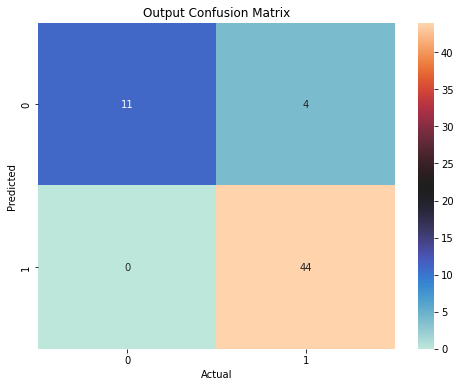

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict3)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap='icefire')
figure=fg.get_figure()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Output Confusion Matrix')

In [ ]:
pickle.dump(model1,open('SVC_model.pkl', 'wb'))
pickle.dump(model2,open('ETC_model.pkl','wb'))
pickle.dump(model3,open('XGB_model.pkl','wb'))